In [4]:
import pandas as pd
import numpy as np

# Downloading the data

In [2]:
#downloading the data from the website
df=pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")

/Users/baheribrahim/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Cleaning of the data

In [3]:
#dropping all the unused features or attributes.
df_1 = df.drop(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY',
       'REPORTNO', 'STATUS', 'INTKEY', 'LOCATION',
       'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT',
       'VEHCOUNT', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'SDOTCOLNUM',
       'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY',
       'HITPARKEDCAR'], axis = 1)

In [6]:
#Replacing all the unknown or other values into empty values.
df_1.replace("Unknown", np.nan, inplace = True)
df_1.replace("Other", np.nan, inplace = True)

In [7]:
# Replacing all empty values in INATTENTIONIND, SPEEDING, and PEDROWNOTGRNT into "N" as NO
df_1["INATTENTIONIND"].replace(np.nan, "N", inplace=True)
df_1["SPEEDING"].replace(np.nan, "N", inplace=True)
df_1["PEDROWNOTGRNT"].replace(np.nan, "N", inplace=True)

In [8]:
# Droping all the raws having empty values in the following features
df_2 = df_1.dropna(subset=["ADDRTYPE", "WEATHER", "ROADCOND", "LIGHTCOND", "SEVERITYCODE"], axis=0)

In [9]:
# Confirming the dropping of the values 
print (df_1.shape)
print (df_2.shape)

(194673, 9)
(169247, 9)


In [10]:
# Coding all the categorical values into float number 
coding = {"ADDRTYPE":     {"Alley": 1.0, "Block": 2.0, "Intersection": 3.0},
                "WEATHER": {"Clear": 1.0, "Partly Cloudy": 2.0, "Overcast": 3.0, "Blowing Sand/Dirt": 4.0,
                                  "Severe Crosswind": 5.0, "Fog/Smog/Smoke": 6.0, "Raining": 7.0, "Snowing": 8.0, "Sleet/Hail/Freezing Rain": 9.0}, "ROADCOND": {"Dry": 1.0, "Sand/Mud/Dirt": 2.0, "Wet": 3.0, "Standing Water": 4.0,
                                  "Snow/Slush": 5.0, "Ice": 6.0, "Oil": 7.0}, "LIGHTCOND": {"Daylight": 1.0, "Dawn": 2.0, "Dusk": 3.0, "Dark - Street Lights On": 4.0,
                                  "Dark - Unknown Lighting": 5.0, "Dark - Street Lights Off": 6.0, "Dark - No Street Lights": 7.0}, "INATTENTIONIND": {"Y": 1.0, "N": 0.0},"SPEEDING": {"Y": 1.0, "N": 0.0}, "PEDROWNOTGRNT": {"Y": 1.0, "N": 0.0}, "UNDERINFL": {"0":0.0, "1": 1.0, "N": 0.0, "Y": 1.0}}
df_2.replace(coding, inplace=True)
print (df_2.shape)
df_2.head()

/Users/baheribrahim/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6666: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


(169247, 9)


,SEVERITYCODE,ADDRTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING
0,2,3.0,0.0,0.0,3.0,3.0,1.0,0.0,0.0
1,1,2.0,0.0,0.0,7.0,3.0,4.0,0.0,0.0
2,1,2.0,0.0,0.0,3.0,1.0,1.0,0.0,0.0
3,1,2.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,2,3.0,0.0,0.0,7.0,3.0,1.0,0.0,0.0


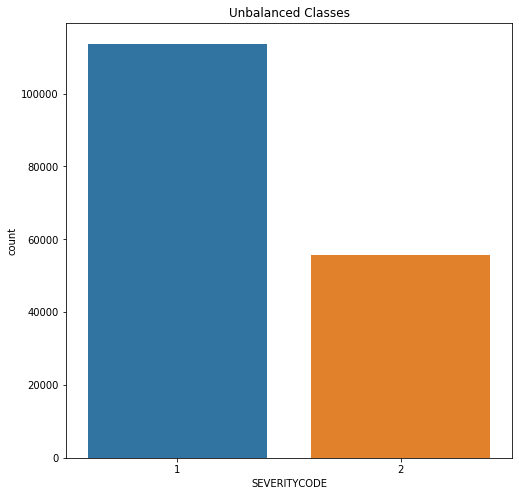

In [11]:
#Checking the distribution of the target observations to examine for the balanced data.
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(8, 8))
sns.countplot('SEVERITYCODE', data=df_2)
plt.title('Unbalanced Classes')
plt.show()

In [13]:
!conda install -c anaconda seaborn -y

Solving environment: done

# All requested packages already installed.



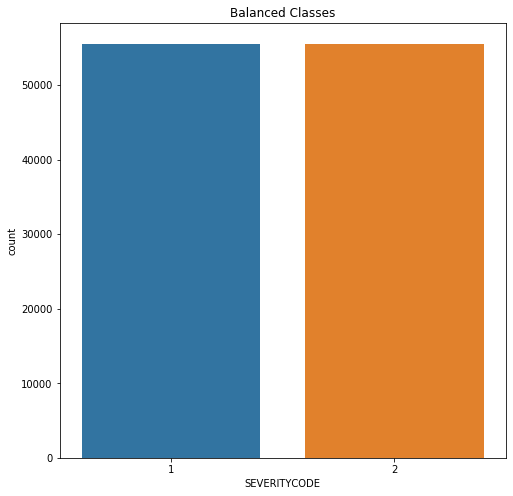

In [14]:
# Random undersampling the severity code = 1 that have a lot of observations to balance the data 

# Shuffle the Dataset.
shuffled_df = df_2.sample(frac=1,random_state=4)
# Put all the fraud class in a separate dataset.
injury_df = shuffled_df.loc[shuffled_df['SEVERITYCODE'] == 2]
#Randomly select 492 observations from the non-fraud (majority class)
prodamage_df = shuffled_df.loc[shuffled_df['SEVERITYCODE'] == 1].sample(n=55500,random_state=42)
# Concatenate both dataframes again
normalized_df = pd.concat([injury_df, prodamage_df])
#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('SEVERITYCODE', data=normalized_df)
plt.title('Balanced Classes')
plt.show()

In [15]:
# Confirming the change 
normalized_df['SEVERITYCODE'] = normalized_df['SEVERITYCODE'].apply(int)

In [16]:
# confirming of the size of the new dataframe after balancing
normalized_df.shape

(111042, 9)

# Assigning the data into X and y variables

In [17]:
# Dividing the independent features into enviroment related (X_ER), driver related (X_DR), or all (X_all)
X_ER= normalized_df[['ADDRTYPE', 'WEATHER','ROADCOND', 'LIGHTCOND']].values
X_ER[0:5]

array([[2., 1., 1., 4.],
       [2., 1., 1., 4.],
       [3., 1., 1., 4.],
       [2., 3., 3., 1.],
       [2., 1., 1., 1.]])

In [18]:
X_DR= normalized_df[['INATTENTIONIND', 'UNDERINFL','PEDROWNOTGRNT', 'SPEEDING']].values
X_DR[0:5]

array([[0., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [19]:
X_all= normalized_df[['ADDRTYPE', 'INATTENTIONIND', 'UNDERINFL',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SPEEDING']].values
X_all[0:5]

array([[2., 0., 0., 1., 1., 4., 0., 0.],
       [2., 0., 1., 1., 1., 4., 0., 0.],
       [3., 0., 0., 1., 1., 4., 0., 0.],
       [2., 0., 0., 3., 3., 1., 0., 0.],
       [2., 0., 0., 1., 1., 1., 0., 0.]])

In [35]:
# making y as the dependent or the target feature
normalized_df['SEVERITYCODE'] = normalized_df['SEVERITYCODE'].apply(str)
y = normalized_df['SEVERITYCODE'].values
y[0:5]

array(['2', '2', '2', '2', '2'], dtype=object)

In [21]:
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

# Normalizaing and splitting the data into training and test sets

In [22]:
# Standerdized normalization
X_ER = preprocessing.StandardScaler().fit(X_ER).transform(X_ER.astype(float))
X_DR = preprocessing.StandardScaler().fit(X_DR).transform(X_DR.astype(float))
X_all = preprocessing.StandardScaler().fit(X_all).transform(X_all.astype(float))

print (X_ER[0:5])
print (X_DR[0:5])
print (X_all[0:5])

[[-0.78762815 -0.64758657 -0.60951043  1.40922271]
 [-0.78762815 -0.64758657 -0.60951043  1.40922271]
 [ 1.23901546 -0.64758657 -0.60951043  1.40922271]
 [-0.78762815  0.19685053  1.41016242 -0.674031  ]
 [-0.78762815 -0.64758657 -0.60951043 -0.674031  ]]
[[-0.45666342 -0.24276449 -0.19949183 -0.24357459]
 [-0.45666342  4.11921851 -0.19949183 -0.24357459]
 [-0.45666342 -0.24276449 -0.19949183 -0.24357459]
 [-0.45666342 -0.24276449 -0.19949183 -0.24357459]
 [-0.45666342 -0.24276449 -0.19949183 -0.24357459]]
[[-0.78762815 -0.45666342 -0.24276449 -0.64758657 -0.60951043  1.40922271
  -0.19949183 -0.24357459]
 [-0.78762815 -0.45666342  4.11921851 -0.64758657 -0.60951043  1.40922271
  -0.19949183 -0.24357459]
 [ 1.23901546 -0.45666342 -0.24276449 -0.64758657 -0.60951043  1.40922271
  -0.19949183 -0.24357459]
 [-0.78762815 -0.45666342 -0.24276449  0.19685053  1.41016242 -0.674031
  -0.19949183 -0.24357459]
 [-0.78762815 -0.45666342 -0.24276449 -0.64758657 -0.60951043 -0.674031
  -0.19949183 

In [23]:
# Spliting the data into training and test sets 
from sklearn.model_selection import train_test_split
X_ER_train, X_ER_test, y_ER_train, y_ER_test = train_test_split( X_ER, y, test_size=0.2, random_state=4)
X_DR_train, X_DR_test, y_DR_train, y_DR_test = train_test_split( X_DR, y, test_size=0.2, random_state=4)
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split( X_all, y, test_size=0.2, random_state=4)
print ('Train set for X_ER:', X_ER_train.shape,  y_ER_train.shape)
print ('Test set for X_ER:', X_ER_test.shape,  y_ER_test.shape)
print ('Train set for X_DR:', X_DR_train.shape,  y_DR_train.shape)
print ('Test set for X_DR:', X_DR_test.shape,  y_DR_test.shape)
print ('Train set for X_all:', X_all_train.shape,  y_all_train.shape)
print ('Test set for X_all:', X_all_test.shape,  y_all_test.shape)

Train set for X_ER: (88833, 4) (88833,)
Test set for X_ER: (22209, 4) (22209,)
Train set for X_DR: (88833, 4) (88833,)
Test set for X_DR: (22209, 4) (22209,)
Train set for X_all: (88833, 8) (88833,)
Test set for X_all: (22209, 8) (22209,)


# Classification models
# K Nearest Neighbor(KNN)

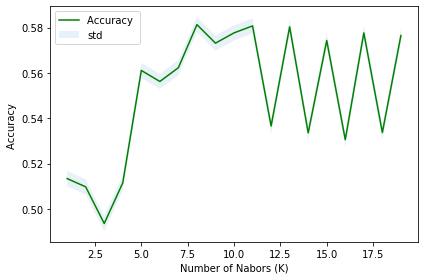

The best accuracy was with 0.5812958710432707 with k= 8


In [24]:
# K Nearest Neighbor(KNN) for X_ER 
# Finding the best k
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];

for n in range(1,Ks):
    neigh_ER = KNeighborsClassifier(n_neighbors = n).fit(X_ER_train,y_ER_train)
    yhat_ER=neigh_ER.predict(X_ER_test)
    mean_acc[n-1] = metrics.accuracy_score(y_ER_test, yhat_ER)
    std_acc[n-1]=np.std(yhat_ER==y_ER_test)/np.sqrt(yhat_ER.shape[0])

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', 'std'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

In [35]:
#Using the k of the best accuracy
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
#Using the k of the best accuracy
k = 8
neigh_ER= KNeighborsClassifier(n_neighbors = k).fit(X_ER_train,y_ER_train)
neigh_ER
yhat_ER= neigh_ER.predict(X_ER_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_ER_train, neigh_ER.predict(X_ER_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_ER_test, yhat_ER))
print ('f1_score = ', f1_score(y_ER_test, yhat_ER, average='weighted') )

Train set Accuracy:  0.5774205531728074
Test set Accuracy:  0.5812958710432707
f1_score =  0.5723276015901528


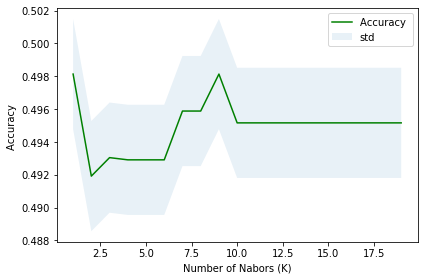

The best accuracy was with 0.4981313881759647 with k= 1


In [200]:
# K Nearest Neighbor(KNN) for X_DR
# Finding the best k
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];

for n in range(1,Ks):
    neigh_DR = KNeighborsClassifier(n_neighbors = n).fit(X_DR_train,y_DR_train)
    yhat_DR=neigh_DR.predict(X_DR_test)
    mean_acc[n-1] = metrics.accuracy_score(y_DR_test, yhat_DR)
    std_acc[n-1]=np.std(yhat_DR==y_DR_test)/np.sqrt(yhat_DR.shape[0])

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', 'std'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

In [194]:
#Using the k of the best accuracy
k = 1
neigh_DR= KNeighborsClassifier(n_neighbors = k).fit(X_DR_train,y_DR_train)
neigh_DR
yhat_DR= neigh_DR.predict(X_DR_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_DR_train, neigh_DR.predict(X_DR_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_DR_test, yhat_DR))
print ('f1_score = ', f1_score(y_DR_test, yhat_DR, average='weighted') )
#print ('jaccard_similarity_score = ', jaccard_similarity_score(y_DR_test, yhat_DR))

Train set Accuracy:  0.5006360249006563
Test set Accuracy:  0.4981313881759647
f1_score =  0.33150892331035603


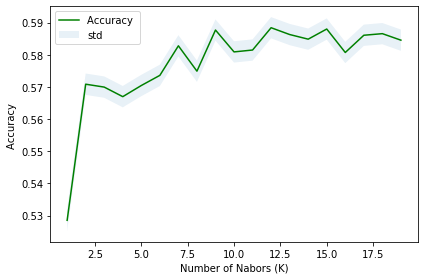

The best accuracy was with 0.5884101040118871 with k= 12


In [201]:
# K Nearest Neighbor(KNN) for X_all
# Finding the best k
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];

for n in range(1,Ks):
    neigh_all = KNeighborsClassifier(n_neighbors = n).fit(X_all_train,y_all_train)
    yhat_all=neigh_all.predict(X_all_test)
    mean_acc[n-1] = metrics.accuracy_score(y_all_test, yhat_all)
    std_acc[n-1]=np.std(yhat_all==y_all_test)/np.sqrt(yhat_all.shape[0])

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', 'std'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

In [203]:
#Using the k of the best accuracy
k = 12
neigh_all= KNeighborsClassifier(n_neighbors = k).fit(X_all_train,y_all_train)
neigh_all
yhat_all= neigh_all.predict(X_all_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_all_train, neigh_all.predict(X_all_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_all_test, yhat_all))
print ('f1_score = ', f1_score(y_all_test, yhat_all, average='weighted') )
#print ('jaccard_similarity_score = ', jaccard_similarity_score(y_all_test, yhat_all))

Train set Accuracy:  0.586505015028199
Test set Accuracy:  0.5884101040118871
f1_score =  0.5834409926411501


# Support vector machine (SVM)

In [25]:
# SVM for X_ER
import pylab as pl
import scipy.optimize as opt
from sklearn import svm
clf_ER = svm.SVC(kernel='rbf')
clf_ER.fit(X_ER_train, y_ER_train) 
yhat_svm_ER = clf_ER.predict(X_ER_test)
yhat_svm_ER
print ('f1_score = ', f1_score(y_ER_test, yhat_svm_ER, average='weighted') )

/Users/baheribrahim/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


f1_score =  0.5895518066992728


In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           1       0.58      0.70      0.63     11143
           2       0.62      0.49      0.55     11066

    accuracy                           0.59     22209
   macro avg       0.60      0.59      0.59     22209
weighted avg       0.60      0.59      0.59     22209

Confusion matrix, without normalization
[[7783 3360]
 [5655 5411]]
f1_score =  0.5895518066992728


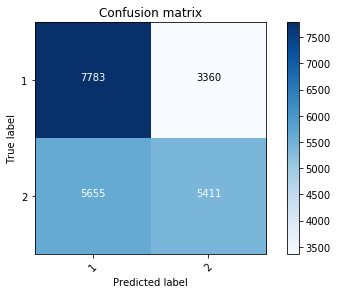

In [209]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_ER_test, yhat_svm_ER, labels=['1','2'])
np.set_printoptions(precision=2)

print (classification_report(y_ER_test, yhat_svm_ER))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,2],normalize= False,  title='Confusion matrix')

from sklearn.metrics import f1_score
f1_score(y_ER_test, yhat_svm_ER, average='weighted') 
print ('f1_score = ', f1_score(y_ER_test, yhat_svm_ER, average='weighted') )

In [210]:
# SVM for X_DR
clf_DR = svm.SVC(kernel='rbf')
clf_DR.fit(X_DR_train, y_DR_train) 
yhat_svm_DR = clf_ER.predict(X_DR_test)
yhat_svm_DR
print ('f1_score = ', f1_score(y_DR_test, yhat_svm_DR, average='weighted') )

f1_score =  0.4542078261806999


              precision    recall  f1-score   support

           1       0.51      0.84      0.63     11143
           2       0.53      0.18      0.27     11066

    accuracy                           0.51     22209
   macro avg       0.52      0.51      0.45     22209
weighted avg       0.52      0.51      0.45     22209

Confusion matrix, without normalization
[[9375 1768]
 [9039 2027]]
f1_score =  0.4542078261806999


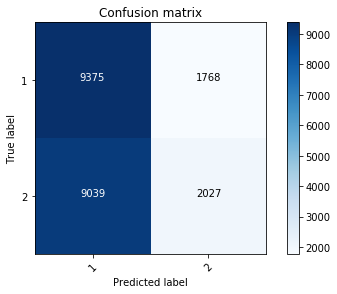

In [211]:
cnf_matrix = confusion_matrix(y_DR_test, yhat_svm_DR, labels=['1','2'])
np.set_printoptions(precision=2)

print (classification_report(y_DR_test, yhat_svm_DR))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,2],normalize= False,  title='Confusion matrix')

from sklearn.metrics import f1_score
f1_score(y_DR_test, yhat_svm_DR, average='weighted') 
print ('f1_score = ', f1_score(y_DR_test, yhat_svm_DR, average='weighted') )

In [83]:
# SVM for X_all
clf_all = svm.SVC(kernel='rbf')
clf_all.fit(X_all_train, y_all_train) 
yhat_svm_all = clf_all.predict(X_all_test)
yhat_svm_all
print ('f1_score = ', f1_score(y_all_test, yhat_svm_all, average='weighted') )

/Users/baheribrahim/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


f1_score =  0.6029860191109857


              precision    recall  f1-score   support

           1       0.61      0.57      0.59     11143
           2       0.60      0.63      0.61     11066

   micro avg       0.60      0.60      0.60     22209
   macro avg       0.60      0.60      0.60     22209
weighted avg       0.60      0.60      0.60     22209

Normalized confusion matrix
[[0.57 0.43]
 [0.37 0.63]]
f1_score =  0.6029860191109857


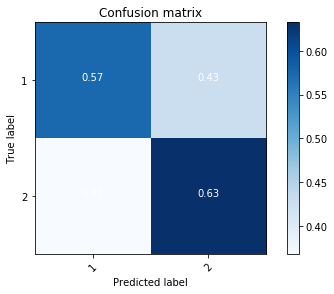

In [85]:
cnf_matrix = confusion_matrix(y_all_test, yhat_svm_all, labels=['1','2'])
np.set_printoptions(precision=2)

print (classification_report(y_all_test, yhat_svm_all))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,2],normalize= True,  title='Confusion matrix')

from sklearn.metrics import f1_score
f1_score(y_all_test, yhat_svm_all, average='weighted') 
print ('f1_score = ', f1_score(y_all_test, yhat_svm_all, average='weighted') )

# Logistic Regression (LR)

In [28]:
from sklearn.linear_model import LogisticRegression
LR_ER = LogisticRegression(C=0.01, solver='liblinear').fit(X_ER_train,y_ER_train)
LR_ER
yhat_lr_ER = LR_ER.predict(X_ER_test)
yhat_lr_ER

yhat_prob_ER = LR_ER.predict_proba(X_ER_test)

print ('f1_score = ', f1_score(y_ER_test, yhat_lr_ER, average='weighted') )
#print ('jaccard_similarity_score = ', jaccard_similarity_score(y_ER_test, yhat_lr_ER))
print ('log_loss = ', log_loss(y_ER_test, yhat_prob_ER))

f1_score =  0.5898628913200256
log_loss =  0.6737026084321782


              precision    recall  f1-score   support

           1       0.58      0.70      0.63     11143
           2       0.62      0.49      0.55     11066

   micro avg       0.59      0.59      0.59     22209
   macro avg       0.60      0.59      0.59     22209
weighted avg       0.60      0.59      0.59     22209

Confusion matrix, without normalization
[[7800 3343]
 [5663 5403]]
f1_score =  0.5898628913200256


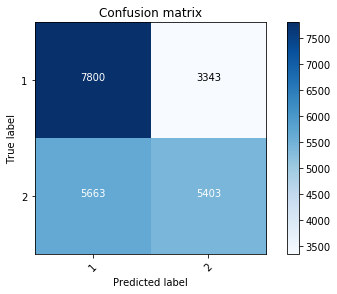

In [30]:
lr_matrix_ER = confusion_matrix(y_ER_test, yhat_lr_ER, labels=['1','2'])
np.set_printoptions(precision=2)

print (classification_report(y_ER_test, yhat_lr_ER))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(lr_matrix_ER, classes=[1,2],normalize= False,  title='Confusion matrix')
f1_score(y_ER_test, yhat_lr_ER, average='weighted') 
print ('f1_score = ', f1_score(y_ER_test, yhat_lr_ER, average='weighted') )

In [31]:
LR_DR = LogisticRegression(C=0.01, solver='liblinear').fit(X_DR_train,y_DR_train)
LR_DR
yhat_lr_DR = LR_DR.predict(X_DR_test)
yhat_lr_DR

yhat_prob_DR = LR_DR.predict_proba(X_DR_test)

print ('f1_score = ', f1_score(y_DR_test, yhat_lr_DR, average='weighted') )
#print ('jaccard_similarity_score = ', jaccard_similarity_score(y_DR_test, yhat_lr_DR))
print ('log_loss = ', log_loss(y_DR_test, yhat_prob_DR))

f1_score =  0.5333183852709878
log_loss =  0.6704618255296246


              precision    recall  f1-score   support

           1       0.54      0.75      0.63     11143
           2       0.58      0.35      0.44     11066

   micro avg       0.55      0.55      0.55     22209
   macro avg       0.56      0.55      0.53     22209
weighted avg       0.56      0.55      0.53     22209

Confusion matrix, without normalization
[[8372 2771]
 [7178 3888]]
f1_score =  0.5333183852709878


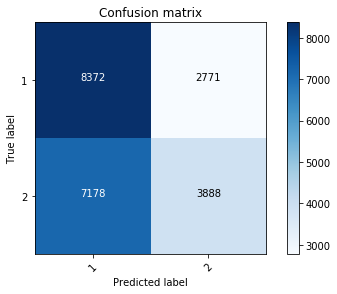

In [32]:
lr_matrix_DR = confusion_matrix(y_DR_test, yhat_lr_DR, labels=['1','2'])
np.set_printoptions(precision=2)

print (classification_report(y_DR_test, yhat_lr_DR))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(lr_matrix_DR, classes=[1,2],normalize= False,  title='Confusion matrix')
f1_score(y_DR_test, yhat_lr_DR, average='weighted') 
print ('f1_score = ', f1_score(y_DR_test, yhat_lr_DR, average='weighted') )

In [33]:
LR_all = LogisticRegression(C=0.01, solver='liblinear').fit(X_all_train,y_all_train)
LR_all
yhat_lr_all = LR_all.predict(X_all_test)
yhat_lr_all

yhat_prob_all = LR_all.predict_proba(X_all_test)

print ('f1_score = ', f1_score(y_all_test, yhat_lr_all, average='weighted') )
#print ('jaccard_similarity_score = ', jaccard_similarity_score(y_all_test, yhat_lr_all))
print ('log_loss = ', log_loss(y_all_test, yhat_prob_all))

f1_score =  0.6026164830782991
log_loss =  0.6534023993455856


              precision    recall  f1-score   support

           1       0.59      0.67      0.63     11143
           2       0.62      0.54      0.58     11066

   micro avg       0.60      0.60      0.60     22209
   macro avg       0.61      0.60      0.60     22209
weighted avg       0.61      0.60      0.60     22209

Confusion matrix, without normalization
[[7412 3731]
 [5061 6005]]
f1_score =  0.6026164830782991


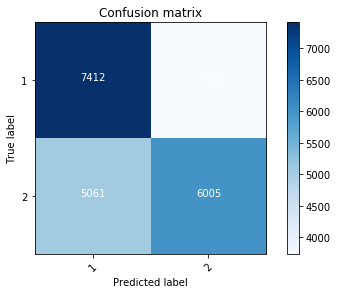

In [34]:
lr_matrix_all = confusion_matrix(y_all_test, yhat_lr_all, labels=['1','2'])
np.set_printoptions(precision=2)

print (classification_report(y_all_test, yhat_lr_all))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(lr_matrix_all, classes=[1,2],normalize= False,  title='Confusion matrix')
f1_score(y_all_test, yhat_lr_all, average='weighted') 
print ('f1_score = ', f1_score(y_all_test, yhat_lr_all, average='weighted') )

# Decision Tree (DT)

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Tree # it shows the default parameters
Tree.fit(X_all_train,y_all_train)
predTree = Tree.predict(X_all_test)
print (predTree [0:5])
print (y_all_test [0:5])
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_all_test, predTree))

['2' '1' '2' '1' '2']
['2' '2' '2' '2' '1']
DecisionTrees's Accuracy:  0.6022333288306543


In [64]:
Tree_ER = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Tree_ER # it shows the default parameters
Tree_ER.fit(X_ER_train,y_ER_train)
predTree_ER = Tree_ER.predict(X_ER_test)
print (predTree_ER [0:5])
print (y_ER_test [0:5])
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_ER_test, predTree_ER))

['2' '1' '1' '1' '2']
['2' '2' '2' '2' '1']
DecisionTrees's Accuracy:  0.5944887207888694


In [65]:
Tree_DR = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Tree_DR # it shows the default parameters
Tree_DR.fit(X_DR_train,y_DR_train)
predTree_DR = Tree_DR.predict(X_DR_test)
print (predTree_DR [0:5])
print (y_DR_test [0:5])
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_DR_test, predTree_DR))

['1' '1' '2' '1' '1']
['2' '2' '2' '2' '1']
DecisionTrees's Accuracy:  0.5520284569318744


In [234]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: done

## Package Plan ##

  environment location: /Users/baheribrahim/opt/anaconda3

  added / updated specs:
    - pydotplus


The following packages will be UPDATED:

  conda                        anaconda::conda-4.8.5-py37_0 --> conda-forge::conda-4.8.5-py37hc8dfbb8_1


Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done

# All requested packages already installed.



In [238]:
!pip install --upgrade scikit-learn==0.20.3

     |████████████████████████████████| 8.0 MB 4.2 MB/s eta 0:00:01     |███████████████████████▌        | 5.9 MB 4.2 MB/s eta 0:00:01
ERROR: imbalanced-learn 0.7.0 has requirement scikit-learn>=0.23, but you'll have scikit-learn 0.20.3 which is incompatible.
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2


In [66]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

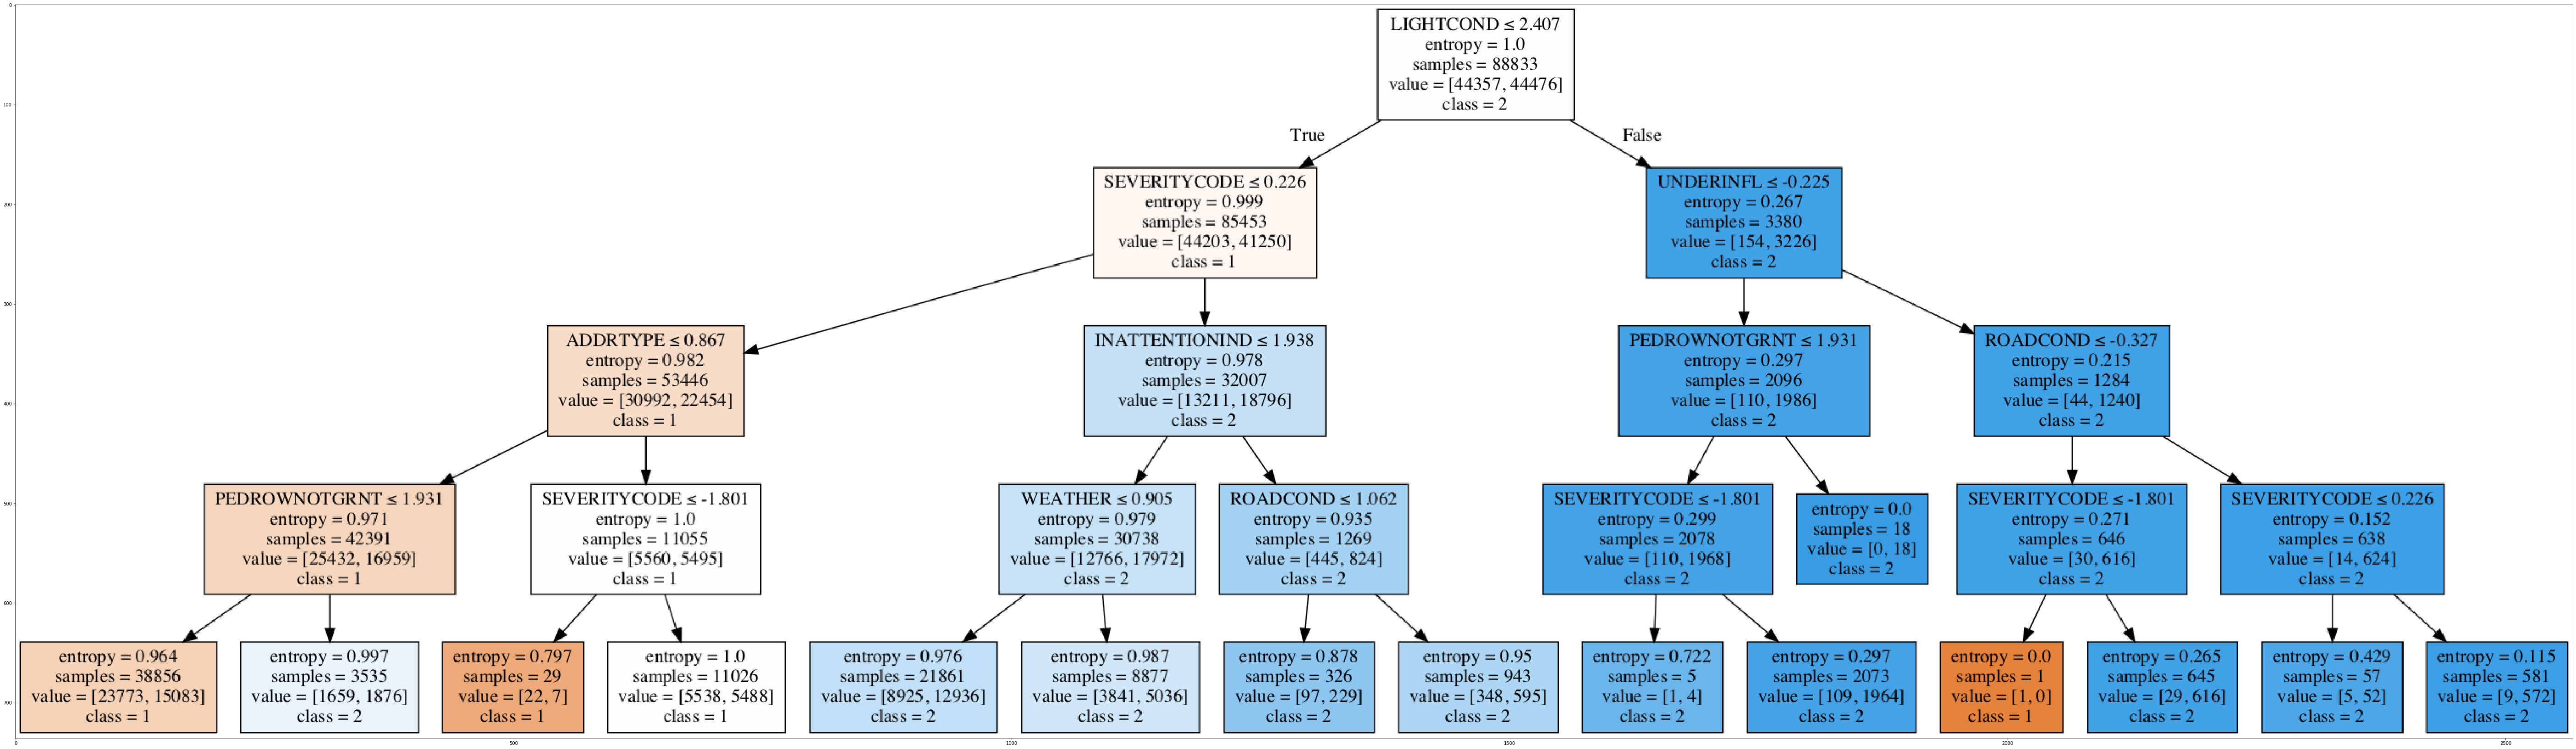

In [67]:
dot_data = StringIO()
filename = "tree.png"
featureNames = normalized_df.columns[0:8]
targetNames = normalized_df["SEVERITYCODE"].unique().tolist()
out=tree.export_graphviz(Tree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_all_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

# Conclusion

In [79]:
# Conclusion 
data= ['Enviroment related features', 0.57, 0.59, 0.59, 0.67, 0.59], ['Driver related features', 0.33, 0.45, 0.53, 0.67, 0.55], ['All features',0.58, 0.60,0.60, 0.65, 0.60] 
df_con= pd.DataFrame(data, columns = ['Condition', 'F1-score_KNN', 'F1-score_SVM', 'F1-score_LR', 'LogLoss_LR', 'DecisionTrees_Accuracy']) 
df_con.set_index('Condition')

,F1-score_KNN,F1-score_SVM,F1-score_LR,LogLoss_LR,DecisionTrees_Accuracy
Condition,,,,,
Enviroment related features,0.57,0.59,0.59,0.67,0.59
Driver related features,0.33,0.45,0.53,0.67,0.55
All features,0.58,0.60,0.60,0.65,0.60
